## Behavioral_Cloning_Report

## Overview 
This project is about behavioral cloning.  We trained neural network to drive a car (simulator) around the track on its own.  
The design will require building a neural network model, training it using data collected from human driving behavior. Then use the trained neural network model to drive the car.

The goals / steps of this project are the following:
* Use the simulator to collect data of good driving behavior
* Build, a convolution neural network in Keras that predicts steering angles from images
* Train and validate the model with a training and validation set
* Test that the model successfully drives around track one without leaving the road


## Collecting data from good driving car behavior
Using provided simulator to drive around the tract to collect data to data directory (data),  we drive:
1.	2 laps on center lane
2.	1 lap focusing on smooth drive around the curve
3.	1 lap to recover driving from side to side around the track.


## Create convolution Neural Network Models from Keras
We experienced with 4 neural network models :
    1. nvidia, 
    2. lenet1, 
    3. lenet2, 
    4. lenet3.



With many iteration the model from Nvidia performed the best on the test drive through simulator.

In [ ]:
Nvidia  model

Layer (type)                         Output Shape          Param #     Connected to                     
=================================================================
01. lambda_5 (Lambda)                (None, 160, 320, 3)   0           lambda_input_5[0][0]             
02. cropping2d_4 (Cropping2D)        (None, 65, 320, 3)    0           lambda_5[0][0]                   
03. convolution2d_15 (Convolution2D) (None, 31, 158, 24)   1824        cropping2d_4[0][0]               
04. convolution2d_16 (Convolution2D) (None, 14, 77, 36)    21636       convolution2d_15[0][0]          
05. convolution2d_17 (Convolution2D) (None, 5, 37, 48)     43248       convolution2d_16[0][0]         
06. convolution2d_18 (Convolution2D) (None, 3, 35, 64)     27712       convolution2d_17[0][0]           
07. convolution2d_19 (Convolution2D) (None, 1, 33, 64)     36928       convolution2d_18[0][0]           
08. flatten_5 (Flatten)              (None, 2112)          0           convolution2d_19[0][0]           
09. dense_13 (Dense)                 (None, 100)           211300      flatten_5[0][0]                  
10. dense_14 (Dense)                 (None, 10)            1010        dense_13[0][0]                   
11. dense_15 (Dense)                 (None, 1)             11          dense_14[0][0]                   
=================================================================


### Reading driving data:


After collecting all driving data, we will have to design away to read the data, to make sure we can handle large amount of data, we use generator to take in one batch of data at a time.
Model.py implemented both ways to get data to analyze:
1.	create_train_model (data_dir, lambda: nvidia_model(), modelfile, epoch)
2.	create_train_model_generator (data_dir, lambda: nvidia_model(), modelfile, epoch)
The first function read everything into memory, the second one read 32 data set at a time.
Therefore, in order to train the neural network model:
Python model.py –m <modelType> –i training_data_dir/ -o modelsaved.h5 –e epoch


### Compiling neural network model:


When it comes to compiling our neural network model, we are using optimizer with parameters set :
1.	loss='mean_squared_error'
2.	lr=0.001, 
3.	beta_1=0.9, 
4.	beta_2=0.999, 
5.	epsilon=1e-08, 
6.	decay=0.0.


### Preprocessing Data stream:

1.	At this time data stream is augmented using augmentation_data()
2.	We crop out images to reduce confusion to model at the first stages of processing 
3.	Test data is 20% of the entire data set.


### Example of Augmented Images

In [7]:
from myLib.BehavioralCloning_ImportFile import *
data_dir  ='./data1_4/'

Using TensorFlow backend.


In [8]:
images, measurements =  load_data (data_dir)

Data Set Length is :  1341 4023 4023


In [11]:
augmented_images, augmented_measurements = [], []
augmented_images, augmented_measurements = augmentation_data(images, measurements)

Data Set Length is :  8046 8046


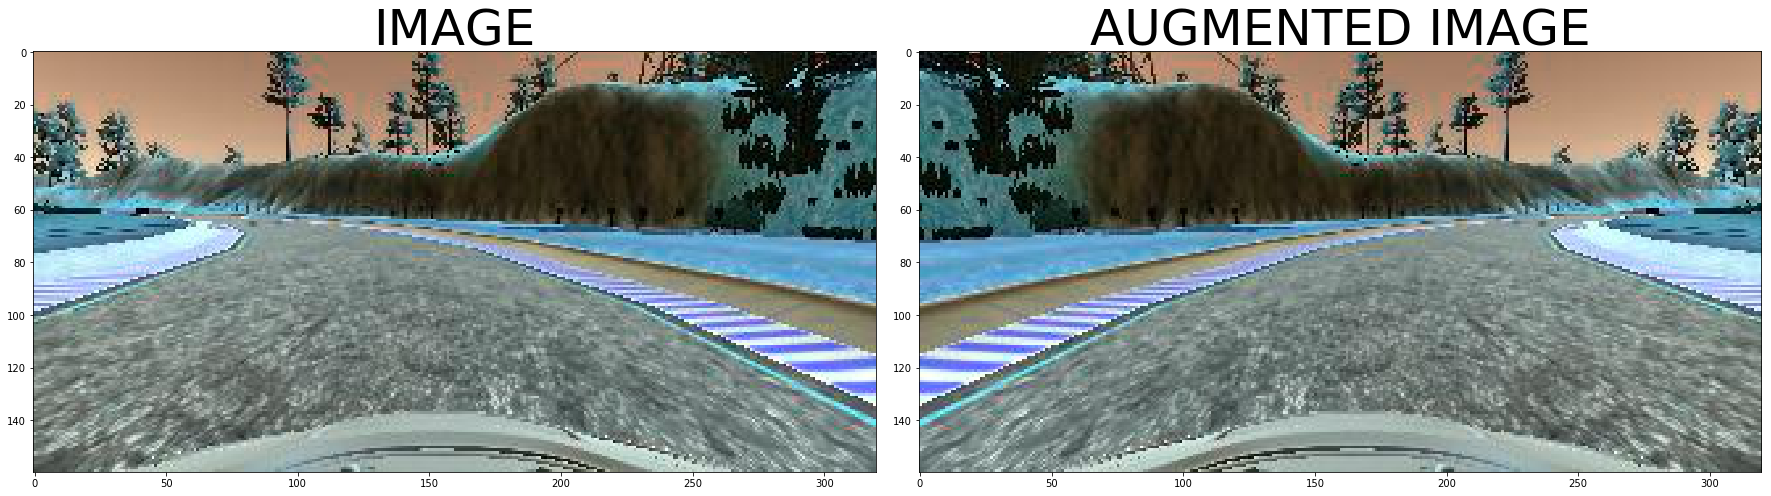

In [12]:
%matplotlib inline
plot_2_images (images[0], augmented_images[1], "IMAGE", "AUGMENTED IMAGE")

### Example of Cropping Images

In [13]:
crop_img = images[0]
crop_img1 = crop_img[50:140, 0:320] # Crop from x, y, w, h -> 100, 200, 300, 400

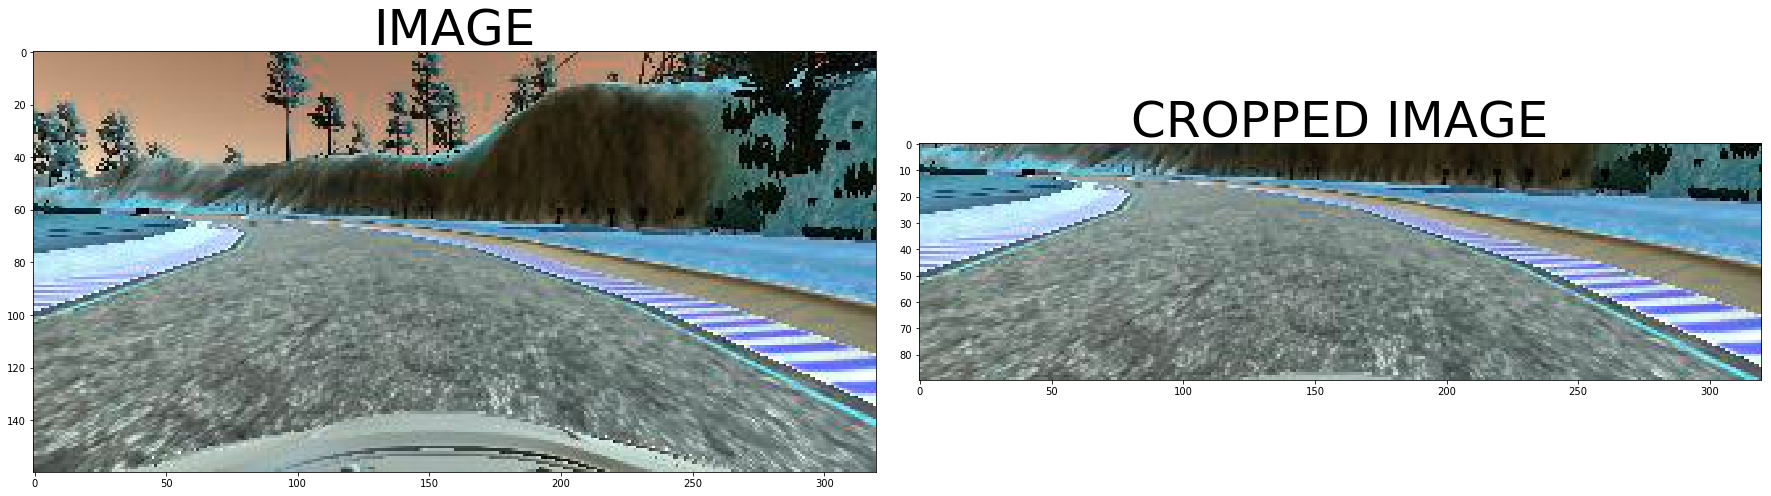

In [14]:
plot_2_images (images[0], crop_img1, "IMAGE", "CROPPED IMAGE")

## Discussion

As a old farmer come to the city, it was amazing to see just by 
1. training the simulator,
2. collecting the training data,
3. creating a convolutional network model, 
4. train the model with collected data, 
5. the car now can be controlled by software !

In this project, changing different models their hyper parameters but 
using same training data we could not see performing change.
However, a set of correct training data is the key toward right solution.

Improvement on the operation was significant when we crop the image, augmented images and use generator to create model.
Would like to thank my awsome reviewer on 
1. fixing drive.py on BGR issues
2. cropping the images earlier in process
3. implement check point to stop  the training process earlier

Saved me hours of work.


## References

In [ ]:
LeNet3 model
__________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
==========================================================================================
lambda_1 (Lambda)                (None, 160, 320, 3)   0           lambda_input_1[0][0]             
_________________________________________________________________________________________
cropping2d_1 (Cropping2D)        (None, 65, 320, 3)    0           lambda_1[0][0]                   
__________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 61, 316, 6)    456         cropping2d_1[0][0]               
__________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 30, 158, 6)    0           convolution2d_1[0][0]            
__________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 26, 154, 6)    906         maxpooling2d_1[0][0]             
_________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 13, 77, 6)     0           convolution2d_2[0][0]           
_________________________________________________________________________________________
flatten_1 (Flatten)              (None, 6006)          0           maxpooling2d_2[0][0]             
_________________________________________________________________________________________
dense_1 (Dense)                  (None, 120)           720840      flatten_1[0][0]                  
________________________________________________________________________________________
dense_2 (Dense)                  (None, 84)            10164       dense_1[0][0]                    
_________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             85          dense_2[0][0]                    
=========================================================================================


In [ ]:
LetNet2 model
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
lambda_8 (Lambda)                (None, 160, 320, 3)   0           lambda_input_8[0][0]             
____________________________________________________________________________________________________
cropping2d_7 (Cropping2D)        (None, 65, 320, 3)    0           lambda_8[0][0]                   
____________________________________________________________________________________________________
convolution2d_27 (Convolution2D) (None, 61, 316, 6)    456         cropping2d_7[0][0]               
____________________________________________________________________________________________________
maxpooling2d_7 (MaxPooling2D)    (None, 30, 158, 6)    0           convolution2d_27[0][0]           
____________________________________________________________________________________________________
convolution2d_28 (Convolution2D) (None, 26, 154, 16)   2416        maxpooling2d_7[0][0]             
____________________________________________________________________________________________________
maxpooling2d_8 (MaxPooling2D)    (None, 13, 77, 16)    0           convolution2d_28[0][0]           
____________________________________________________________________________________________________
flatten_8 (Flatten)              (None, 16016)         0           maxpooling2d_8[0][0]             
____________________________________________________________________________________________________
dense_20 (Dense)                 (None, 128)           2050176     flatten_8[0][0]                  
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 128)           0           dense_20[0][0]                   
____________________________________________________________________________________________________
dense_21 (Dense)                 (None, 84)            10836       dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 84)            0           dense_21[0][0]                   
____________________________________________________________________________________________________
dense_22 (Dense)                 (None, 1)             85          dropout_2[0][0]                  
====================================================================================================


In [ ]:
LeNet1 model

Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
lambda_2 (Lambda)                (None, 160, 320, 3)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 156, 316, 6)   456         lambda_2[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 78, 158, 6)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 74, 154, 6)    906         maxpooling2d_3[0][0]             
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 37, 77, 6)     0           convolution2d_4[0][0]            
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 17094)         0           maxpooling2d_4[0][0]             
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 120)           2051400     flatten_2[0][0]                  
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 84)            10164       dense_4[0][0]                    
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 1)             85          dense_5[0][0]                    
====================================================================================================
